# Compte Rendu Mini-projet pendule
### Antoine Molines


## Introduction
Le but de ce mini-projet est d'étudier le mouvement d'un pendule dans plusieurs situation différentes: amorti, avec force extérieur. Nouverrons que pour certaines valeurs de paramètes du pendule, le système devient chaotique. Pour faire ces études, nous devrons résoudre des équationj différentielles pour obtenir les équations du mouvement. Pour ce faire, nous utiliserons la méthode de Runge-Kutta d'ordre 4 RK4.

## Première Partie
Dans cette partie, nous allons résoudre les équations du pendule simple en faisant l'approximation des petits angles: $\sin\theta\approx\theta$. L'équation d'un pendule amorti s'écrit alors:$$\frac{\mathrm{d}^{2}\theta}{\mathrm{d}t^{2}}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^{2}\theta=0$$ avec $\theta$ l'angle que fait le pendule par rapport à la verticale, $\Omega=\sqrt{{g/l}}$ est la pulsation propre et $q$ est le terme de frottement fluide. On prendra par la suite $\Omega=1$ $\mathrm{rad\cdot s^{-1}}$.\
Nous allons donc résoudre cette équation pour $q=1,2,5$ et tracer ces solutions sur un même graphique, avec comme conditions initiales: $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$ et un pas de temps $\mathrm{d}t=0.05\mathrm{~s}$ pour $t$ allant de $0$ à $20\mathrm{~s}$:

Commencons par importer les modules et définir les paramètres:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#paramètre
Omega = 1
phi_0 = np.radians(10)  
dphi_0 = 0
dt = 0.05
ti = 0
tf = 20
q_values = [1, 2, 5] 

Pour la méthode RK4 il nous faut donc définir une fonction dérivée:

In [10]:
def dérivé(state, t, q):   #3 arguments
    theta, w = state       
    dtheta_dt = w
    dw_dt = -q * w - Omega**2 * theta   #calculé à la main
    return np.array([dtheta_dt, dw_dt])   #retourne un tableau

On définit maintenant une fonction pour la méthode de Runge-Kutta

In [9]:
v_ini = np.array([phi_0, dphi_0]) #conditions initiales

ordre=2    #EDO donc ordre 2
def rk4(start, end, step, v_ini, dérivé, ordre, q):     #définition de la focntion
    
    #défintion du tableau de temps
    interval = end - start     
    num_points = int(interval / step) + 1      
    t = np.linspace(start, end, num_points)    

    
    v = np.zeros((ordre, num_points))  #initialisiaton
    v[:, 0] = v_ini   #conditinos initiales
    
    

    #boucle d'intégraiton
    for i in range(num_points - 1):
        k1 = step * dérivé(v[:, i], t[i], q)
        k2 = step * dérivé(v[:, i] + k1 / 2, t[i] + step / 2, q)
        k3 = step * dérivé(v[:, i] + k2 / 2, t[i] + step / 2, q)
        k4 = step * dérivé(v[:, i] + k3, t[i] + step, q)
        v[:, i + 1] = v[:, i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, v

Nous pouvons maintenant tracer les 3 solutions pour les 3 valeurs du taux d'amortissement:

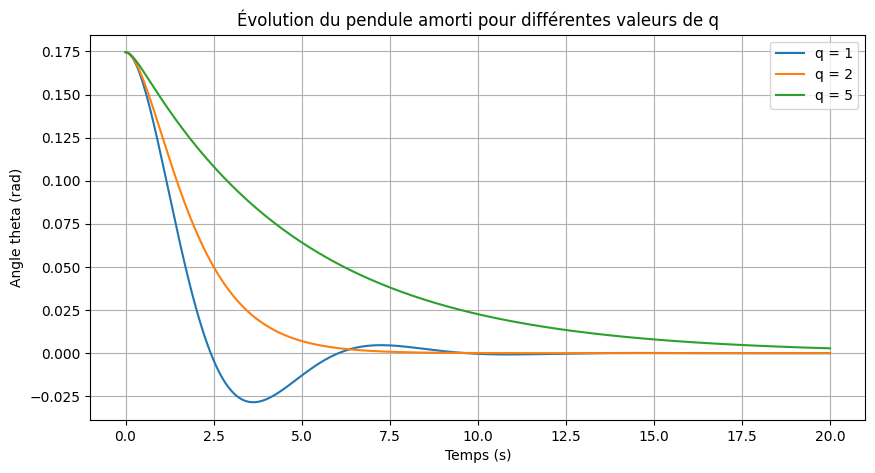

In [13]:
# Tracé des résultats pour différentes valeurs de q
plt.figure(figsize=(10, 5))
for q in q_values:
    t, Drk4 = rk4(ti, tf, dt, v_ini, dérivé, ordre, q)
    plt.plot(t, Drk4[0, :], label=f'q = {q}')

plt.xlabel('Temps (s)')
plt.ylabel('Angle theta (rad)')
plt.title('Évolution du pendule amorti pour différentes valeurs de q')
plt.grid()
plt.legend()
plt.show()

On observe ainsi bien les 3 régimes du pendules: pseudo-périodique pour $q=1$, critique pour $q=2$ et apériodique pour $q=5$

## Deuxième partie
Dans cette deuxième partie, nous allons faire de même mais avec une force d'excitation exterieur supplémentaire. L'équation du mouvement devient alors:
$$ \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+q\frac{\mathrm{d}\theta}{\mathrm{d}t}+\Omega^2\theta=F_e\sin(\Omega_e t) $$
On choisis comme valeur: force excitatrice d'intensité $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.
On peut résoudre cette équation avec le changement de variable $\omega = \dot{\phi}$ pour avoir deux équations d'ordre 1.
On prendra comme valeurs: $q=1$, $F_e=1\mathrm{~rad\cdot s^{-2}}$ et de pulsation $\Omega_e=\frac{2\Omega}{3}$.\
On va donc tracer dans l'espace des phases $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ des solutions pour ces différents cas: pendule libre ($q=0$ et $F_e=0$), amorti ($q=1$ et $F_e=0$), et amorti avec excitation ($q=1$ et $F_e=1$), avec comme conditions initiales $\theta(t=0)=10\mathrm{~°}$  et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$:





In [14]:
# on définit les nouveaux paramètres:
q_values = [1]  

F_0 = 1  # intensité de la force
Omega_e = 2 / 3  # fréquence d'excitation

Il faut donc maintenant définir une nouvelle fonction dérivé pour la fonciton RK4:

In [18]:
# sytemes d'EDO
def dérivé(state, t, q, F_0, Omega_e):
    theta, w = state
    dtheta_dt = w
    dw_dt = -q * w - Omega**2 * theta + F_0 * np.sin(Omega_e * t)
    return np.array([dtheta_dt, dw_dt])

On peut maintenant appliquer la méthode RK4:

In [17]:
def rk4(start, end, step, v_ini, dérivé, ordre, q, F_0, Omega_e):
    #tableau de temps
    interval = end - start                     
    num_points = int(interval / step) + 1      
    t = np.linspace(start, end, num_points)    

    # itinitialisaiton
    v = np.zeros((ordre, num_points))
    v[:, 0] = v_ini  

    # boucle d'int"gration
    for i in range(num_points - 1):
        k1 = step * dérivé(v[:, i], t[i], q, F_0, Omega_e)
        k2 = step * dérivé(v[:, i] + k1 / 2, t[i] + step / 2, q, F_0, Omega_e)
        k3 = step * dérivé(v[:, i] + k2 / 2, t[i] + step / 2, q, F_0, Omega_e)
        k4 = step * dérivé(v[:, i] + k3, t[i] + step, q, F_0, Omega_e)
        v[:, i + 1] = v[:, i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return t, v

#conditions initalies
v_ini = np.array([phi_0, dphi_0])

On peut maintenant tracer dans l'espace des phases pour les 3 cas:

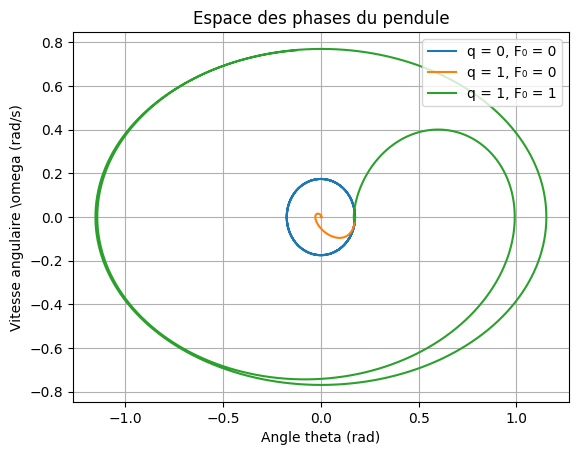

In [23]:
#paramètre pour les trois cas
F_0_values = [0, 0, 1] 
q_values = [0, 1, 1]  


# tracage avec une boucle
plt.figure()
for q, F_0 in zip(q_values, F_0_values):
    t, Drk4 = rk4(ti, tf, dt, v_ini, dérivé, ordre, q, F_0, Omega_e)
    plt.plot(Drk4[0, :], Drk4[1, :], label=f'q = {q}, F₀ = {F_0}')

plt.xlabel('Angle theta (rad)')
plt.ylabel('Vitesse angulaire \omega (rad/s)')
plt.title('Espace des phases du pendule')
plt.grid()
plt.legend()
plt.show()

Nous voyons donc bien l'évolution des 3 trajéctoires du pendule pour les 3 cas: la courbe bleue représente le pendule non-amortie, et forme un cercle infini, ce qui signifie que le pendule ne s'arrète jamais d'osciller; la courbe orange représente le pendule amortie, on voit bien que la courbe tend vers $0$ en oscillant faiblement, ce qui traduit l'amortissement et le fait que le pendule rallentisse; la courbe verte représente le pendule amortie avec une force extérieur, on voit bien qu'il accélère et donc ne s'arrète jamais d'osciller, ce qui est une conséquence de la force, cependant il atteint un seuil d'oscillation qui apparait lorsque l'amortissement compense la force extérieur.

## Troisième Partie
Dans cette partie, nous ne feront plus l'hypothèse de l'approximation des petits angles. Nous devrons ainsi résoudre une équation différentielle non linéaire à l'aide la méthode RK4, et verons que pour certaine valeurs de paramètre le pendule devient un système chaotique. Nous nous placerons dans les conditions suivantes: $\theta(t=0)=10\mathrm{~°}$ et $\frac{\mathrm{d}\theta}{\mathrm{d}t}(t=0)=0$, $\Omega_e=2\Omega/3$, $q=0.5\mathrm{~s^{-1}}$, avec des valeurs de forces exterieurs:$F_e=\{1.4,1.44,1.465,1.5\}\mathrm{~rad\cdot s^{-2}}$.\
Nous faisons l'étude pour $100s$, nous commencons donc par définir de nouveaux paramètres:

In [24]:
#nouveaux paramètres, les noms sont explicites
Omega = 1
phi_0 = np.radians(10) 
dphi_0 = 0
dt = 0.05
ti = 0
tf = 100  
ordre = 2
q = 0.5  
F_values = [1.4, 1.44, 1.465, 1.5]  
Omega_e = 2 * Omega / 3  

Il nous faut également définir une nouvelle fonction dérivé:

In [25]:
def dérivé(state, t, q, F_0, Omega_e):
    theta, w = state
    dtheta_dt = w
    dw_dt = -q * w - Omega**2 * np.sin(theta) + F_0 * np.sin(Omega_e * t)
    return np.array([dtheta_dt, dw_dt])

Comme avant, on applique la méthode RK4:

In [26]:
#foncction RK4
def rk4(start, end, step, v_ini, dérivé, ordre, q, F_0, Omega_e):
    interval = end - start                     
    num_points = int(interval / step) + 1      
    t = np.linspace(start, end, num_points)    

    # initailisaiotn
    v = np.zeros((ordre, num_points))
    v[:, 0] = v_ini  

    #boucle d'intégration
    for i in range(num_points - 1):
        k1 = step * dérivé(v[:, i], t[i], q, F_0, Omega_e)
        k2 = step * dérivé(v[:, i] + k1 / 2, t[i] + step / 2, q, F_0, Omega_e)
        k3 = step * dérivé(v[:, i] + k2 / 2, t[i] + step / 2, q, F_0, Omega_e)
        k4 = step * dérivé(v[:, i] + k3, t[i] + step, q, F_0, Omega_e)
        v[:, i + 1] = v[:, i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        #conditions pour maintenir thehta dans le bon intervalle
        if v[0, i + 1] > np.pi:
            v[0, i + 1] -= 2 * np.pi
        elif v[0, i + 1] < -np.pi:
            v[0, i + 1] += 2 * np.pi

    return t, v


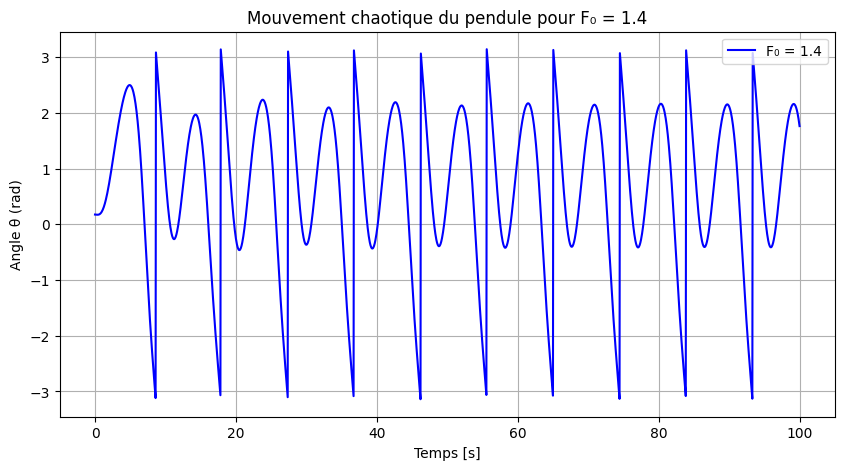

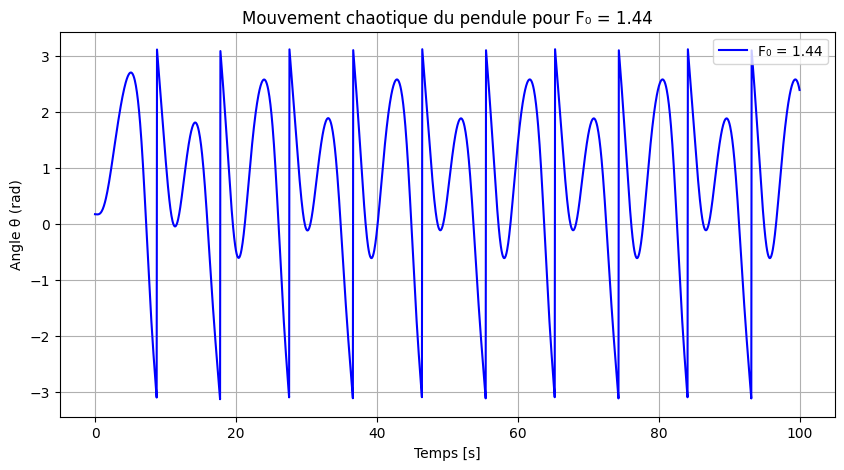

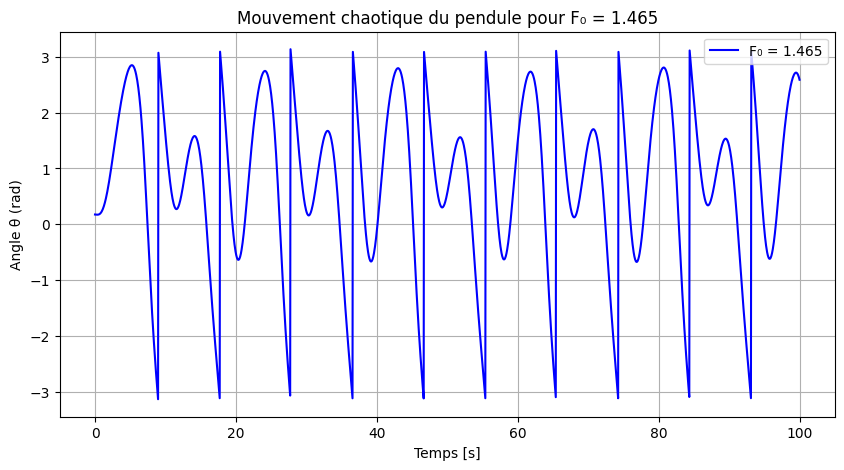

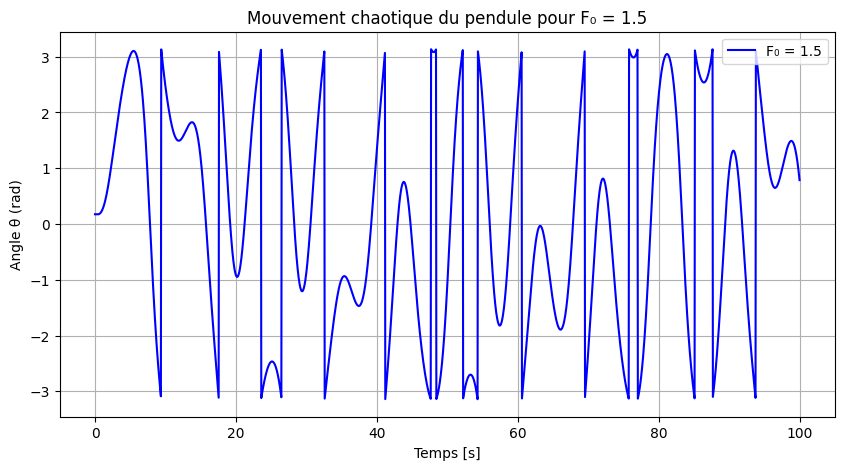

In [29]:
for F_0 in F_values:
    plt.figure(figsize=(10, 5))
    t, Drk4 = rk4(ti, tf, dt, np.array([phi_0, dphi_0]), dérivé, ordre, q, F_0, Omega_e)
    plt.plot(t, Drk4[0, :], label=f'F₀ = {F_0}', color='b')
    plt.xlabel('Temps [s]')
    plt.ylabel('Angle θ (rad)')
    plt.title(f'Mouvement chaotique du pendule pour F₀ = {F_0}')
    plt.grid()
    plt.legend()
    plt.show()

Nous allons maintenant calculer l'évolution de $\theta$ pour deux conditions initiales très proche l'une de l'autre : $\theta(t=0)=10\mathrm{~°}$ et $\theta(t=0)=9.999\mathrm{~°}$ dans le cas de $F_e=1.5\mathrm{~rad\cdot s^{-2}}$, et caclculer la valeur absolue de la différences entre ces deux solutions en échelle semi-log.


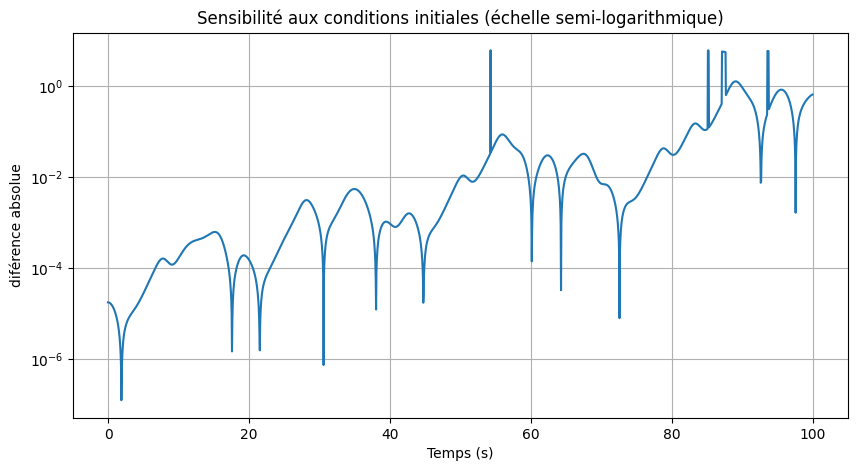

In [34]:
#calcul des dexu solutions via la focntion rk4
t, sol1 = rk4(ti, tf, dt, np.array([phi_0, dphi_0]), dérivé, ordre, q, 1.5, Omega_e)
t, sol2 = rk4(ti, tf, dt, np.array([np.radians(9.999), dphi_0]), dérivé, ordre, q, 1.5, Omega_e)

#TRacage de la différence
plt.figure(figsize=(10, 5))
plt.semilogy(t, np.abs(sol1[0, :] - sol2[0, :]))
plt.xlabel('Temps (s)')
plt.ylabel('diférence absolue')
plt.title('Sensibilité aux conditions initiales (échelle semi-logarithmique)')
plt.grid()

plt.show()


Nous voyons que la différence d'angle que prend le pendule pour ces deux conditions initiales change drastiquement d'un instant à un autre, passsant de valeurts très proches de 0 à plus de 1, ce qui caractérise la nature chaotique du pendule amortie avec force excitatrice.

## Conclusion:
Pour conclure, dans ce mini-projet nous avons appris à utiliser la méthode de Runge-Kutta d'ordre 4 afin de résoudre des équations différentielles de tout types (1 seule variable) pour étudier un pendule dans différent cas. Nous finalement observé que dans certaines conditions, le pendule peut avoir un mouvement chaotique.